In [1]:
# Arbeidskrav 4
 
import pandas as pd #Lese og behandle data
import numpy as np #numeriske operasjoner (generering og manipulering av data)
import matplotlib.pyplot as plt #detaljjusteringer og generell plotting


In [2]:
# 1)  

# Lenke
url = "https://www.motor.no/aktuelt/motors-store-vintertest-av-rekkevidde-pa-elbiler/217132"
 
df_motor = pd.read_html(url) #laster ned tabler fra nettsiden, gir dataframe name df_motor

df_motor = df_motor[0] #velger første tablen og lager i df_motor

print(df_motor)#viser dataframe
 

   Modell (temp. varierte fra 0° til -10°)        WLTP-tall   STOPP     Avvik
0              Tesla Model 3 LR Dual motor  614 km/14,7 kWh  521 km  -15,15 %
1             Mercedes-Benz EQS 580 4matic  645 km/18,3 kWh  513 km  -20,47 %
2                          BMW iX xDrive50  591 km/21,4 kWh  503 km  -14,89 %
3              Tesla Model Y LR Dual motor  507 km/16,9 kWh  451 km  -11,05 %
4                    Volkswagen ID.3 PRO S  539 km/16,3 kWh  435 km  -19,29 %
5                              Kia EV6 2WD  528 km/16,5 kWh  429 km  -18,75 %
6                       NIO ES8 LR 7-seter  488 km/21,5 kWh  425 km  -12,91 %
7                              Kia EV6 4WD  484 km/18,0 kWh  423 km  -12,60 %
8                      Volkswagen ID.4 Pro  485 km/18,4 kWh  414 km  -14,64 %
9                      Hyundai Ioniq 5 2WD  481 km/16,8 kWh  408 km  -15,18 %
10                              BMW i4 M50  497 km/19,0 kWh  406 km  -18,31 %
11                       Skoda Enyaq iV80X  477 km/18,2 kWh  403

In [3]:
# 2)   

# Legger alle benevningene til overskriften for kolonnene 
df_motor.columns = ['Modell', 'wltp-km', 'stopp-km', 'avvik-prosent'] 
 
# Viser og sjekker nye navn til kolonnene
print(df_motor.head()) 

# Del kolonnen med WLTP-tall i to: en for kjørte km og en for energibruk
df_motor[['wltp-km','energibruk-kwh']] = df_motor['wltp-km'].str.split('/', expand = True)
 
# Fjerner km,%,kWh, og bare tall er i kolonnene
df_motor['wltp-km'] = df_motor['wltp-km'].str.replace(' km', '')
df_motor['stopp-km'] = df_motor['stopp-km'].str.replace(' km', '')
df_motor['avvik-prosent'] = df_motor['avvik-prosent'].str.replace('%', '')
df_motor['energibruk-kwh'] = df_motor['energibruk-kwh'].str.replace(' kWh', '')

# Sjekker datafram, x-verdiene i kolonnene stopp-km og avvik-prosent
print(df_motor) 

# Fjerner x-verdiene i kolonnene stopp-km og avvik-prosent
df_motor = df_motor[df_motor['stopp-km'] != 'x']
df_motor = df_motor[df_motor['avvik-prosent'] != 'x']

print(df_motor)


                         Modell          wltp-km stopp-km avvik-prosent
0   Tesla Model 3 LR Dual motor  614 km/14,7 kWh   521 km      -15,15 %
1  Mercedes-Benz EQS 580 4matic  645 km/18,3 kWh   513 km      -20,47 %
2               BMW iX xDrive50  591 km/21,4 kWh   503 km      -14,89 %
3   Tesla Model Y LR Dual motor  507 km/16,9 kWh   451 km      -11,05 %
4         Volkswagen ID.3 PRO S  539 km/16,3 kWh   435 km      -19,29 %
                                  Modell wltp-km stopp-km avvik-prosent  \
0            Tesla Model 3 LR Dual motor     614      521       -15,15    
1           Mercedes-Benz EQS 580 4matic     645      513       -20,47    
2                        BMW iX xDrive50     591      503       -14,89    
3            Tesla Model Y LR Dual motor     507      451       -11,05    
4                  Volkswagen ID.3 PRO S     539      435       -19,29    
5                            Kia EV6 2WD     528      429       -18,75    
6                     NIO ES8 LR 7-seter   

In [4]:
# 3)

# Konverter streng til numerisk
df_motor['wltp-km'] = pd.to_numeric(df_motor['wltp-km'])
df_motor['stopp-km'] = pd.to_numeric(df_motor['stopp-km'])

# Lager en ny kolonne forholdet mellom faktisk og forvente km
df_motor['forholdet'] = df_motor['stopp-km'] / df_motor['wltp-km']

print(df_motor) 

                             Modell  wltp-km  stopp-km avvik-prosent  \
0       Tesla Model 3 LR Dual motor      614       521       -15,15    
1      Mercedes-Benz EQS 580 4matic      645       513       -20,47    
2                   BMW iX xDrive50      591       503       -14,89    
3       Tesla Model Y LR Dual motor      507       451       -11,05    
4             Volkswagen ID.3 PRO S      539       435       -19,29    
5                       Kia EV6 2WD      528       429       -18,75    
6                NIO ES8 LR 7-seter      488       425       -12,91    
7                       Kia EV6 4WD      484       423       -12,60    
8               Volkswagen ID.4 Pro      485       414       -14,64    
9               Hyundai Ioniq 5 2WD      481       408       -15,18    
10                       BMW i4 M50      497       406       -18,31    
11                Skoda Enyaq iV80X      477       403       -15,51    
12   Porsche Taycan 4 Cross Turismo      456       402       -11

In [5]:
# 4)

# Bygger en regresjonsligning eller forutsi verdier
x = df_motor['wltp-km'] #wltp-km er uavhengig variabel 
y = df_motor['stopp-km'] #stopp-km er avhengig variabel

# De optimale a og b beregnes automatisk ved hjelp av minste kvadraters metode
a, b = np.polyfit(x, y, deg=1)  # grad = 1 → lineær regresjon

# print(f"Stigningstall (a): {a:.2f}"),a er stigningstall
# print(f"Skjæring (b): {b:.2f}"), b er skjæring

# Regresjonsmodell:𝑓(𝑥) = 𝑎𝑥 + 𝑏, og beholder to desimaler 
print(f"Regresjonsmodell: y = {a:.2f}x + {b:.2f}")



Regresjonsmodell: y = 0.87x + -26.65


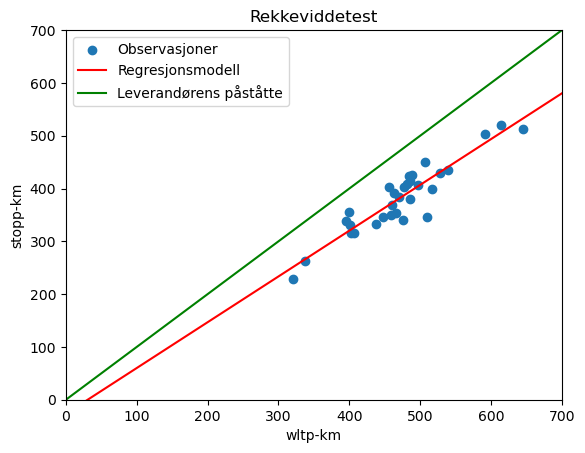

In [6]:
# 5)

# Plott regresjonsmodellen
fig, ax = plt.subplots()

# Legger til aksetiketter
ax.set_xlabel('wltp-km')
ax.set_ylabel('stopp-km')

# Setter aksegrenser
ax.set_xlim(0,700)
ax.set_ylim(0,700)

# Plott datapunktene
ax.scatter(x, y, label='Observasjoner')

# Setter regresjonslinje
x_line = np.linspace(0, 700, 100) 
y_line = a * x_line + b

# Plott regresjonsmodell
ax.plot(x_line, y_line, color='red', label='Regresjonsmodell')

# Plott leverandørens påståtte 
ax.plot(x_line, x_line, color='green', label='Leverandørens påståtte')

# Gir navn til title, setter bildet beste passende plassen
ax.set_title('Rekkeviddetest')
ax.legend(loc='best')

# Viser figuren
plt.show()


In [7]:
# 6)

# Bytter ut komma med prikker
df_motor['avvik-prosent'] = df_motor['avvik-prosent'].str.replace(',', '.')

# Konverter streng til numerisk
df_motor['avvik-prosent'] = pd.to_numeric(df_motor['avvik-prosent'])

# Gjennomsnittlig avvik 
gjennomsnittlig_avvik = df_motor['avvik-prosent'].mean()

# Print gjennomsnittlig avvik med to desimaler og %
print(f'Gjennomsnittlig avvik: {gjennomsnittlig_avvik:.2f}%')


Gjennomsnittlig avvik: -19.07%
